In [10]:
import numpy as np
import pandas as pd

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dataset = pd.read_csv("Classified Data.csv", index_col=0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = dataset.drop('TARGET CLASS', axis=1)
y = dataset['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

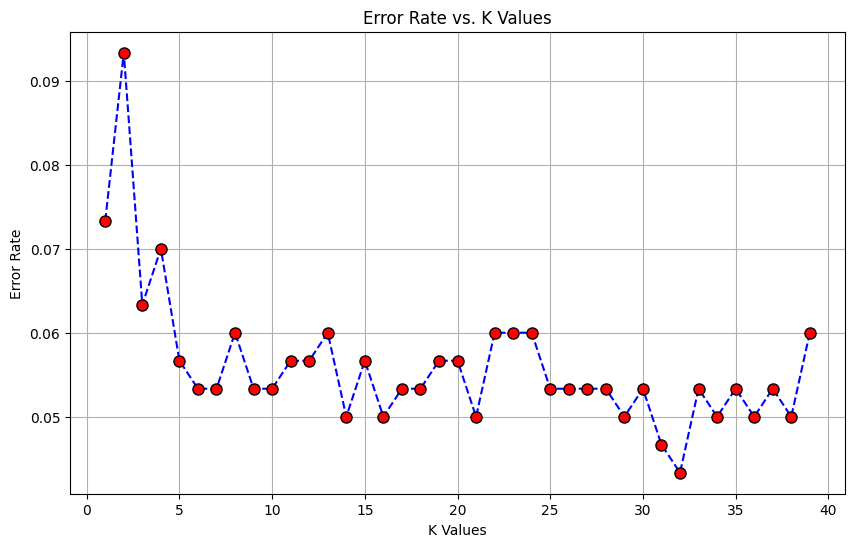

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', ls='--', marker='o',
         markerfacecolor='red', markeredgecolor='black', markersize=8)
plt.title('Error Rate vs. K Values'); plt.grid(visible=True)
plt.xlabel('K Values'); plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

